In [21]:
%run my_functions.ipynb

## SAT Problem 3

#### F(x1,x2,x3) = (x1 v ~x2) & (x2 v x3) & (~x1 v ~x3) & (~x1 v ~x2 v x3)

solution = (x1=0, x2=0, x3=1)

### Using my_functions

3


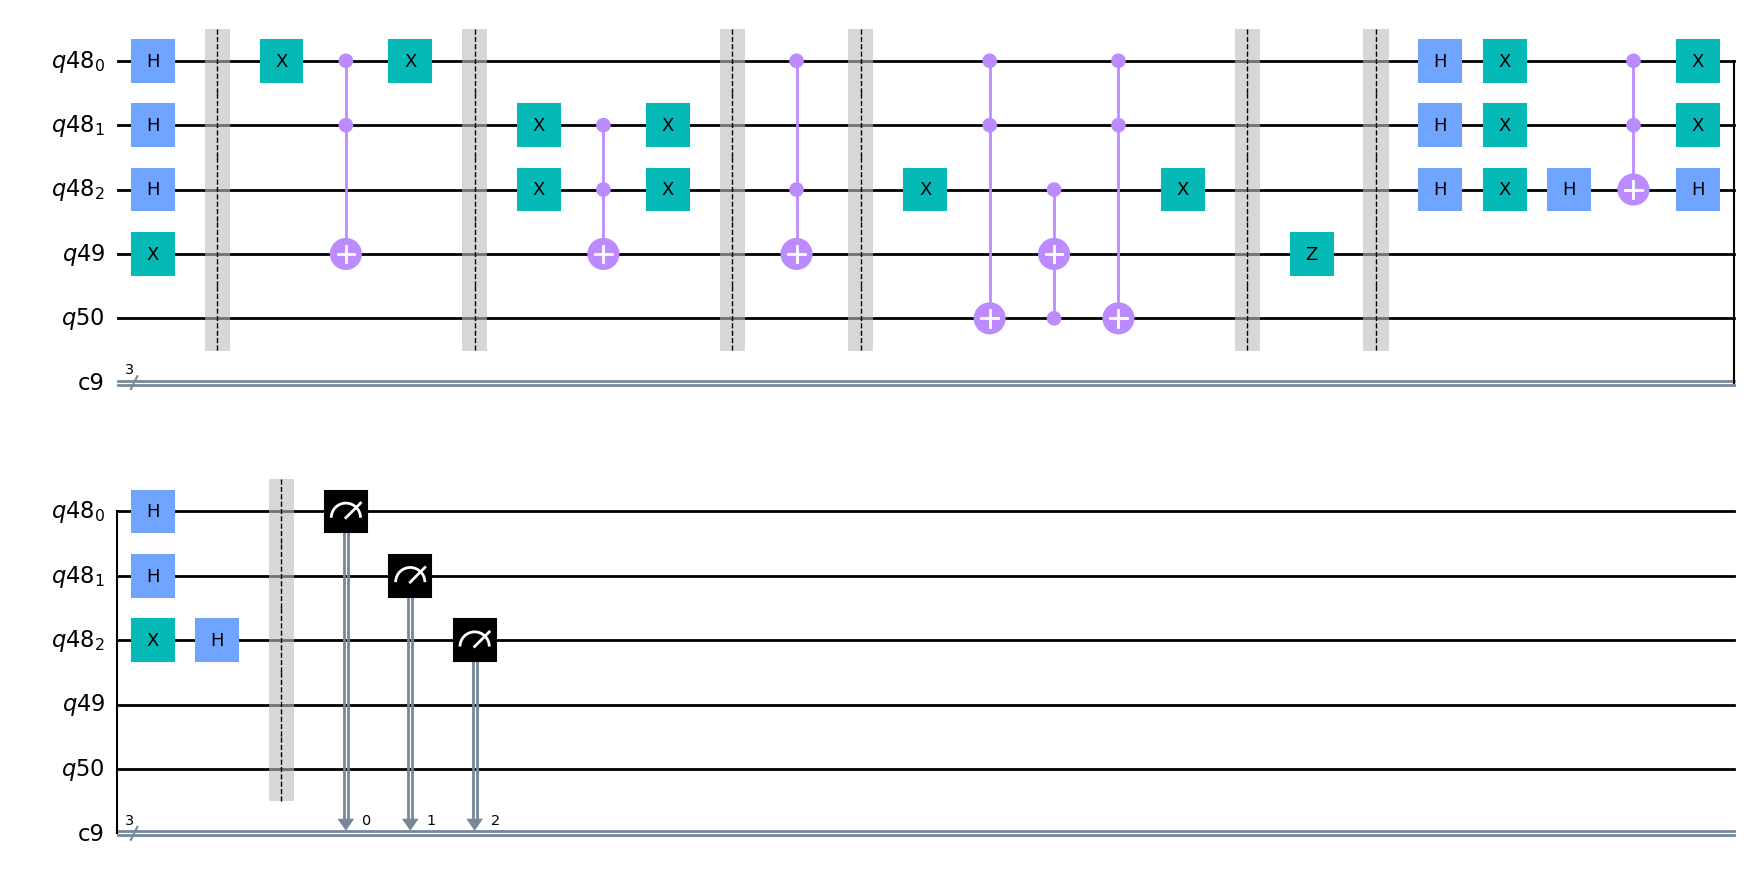

In [22]:
sat_formula = [[1,-2,0],[0,2,3],[-1,0,-3],[-1,-2,3]]
qc = sat3_var3(sat_formula)
qc.draw('mpl')  

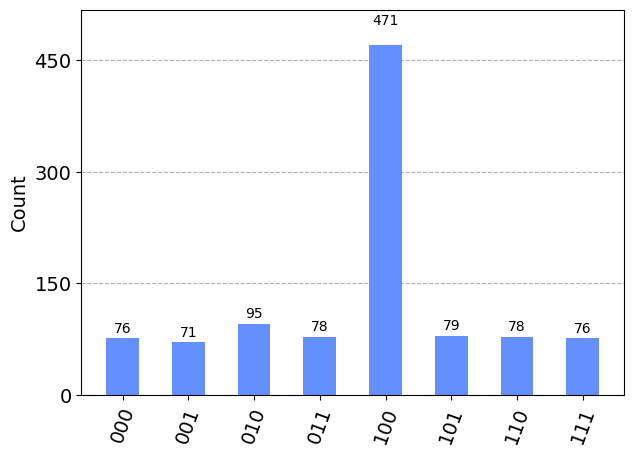

In [23]:
result = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(result)

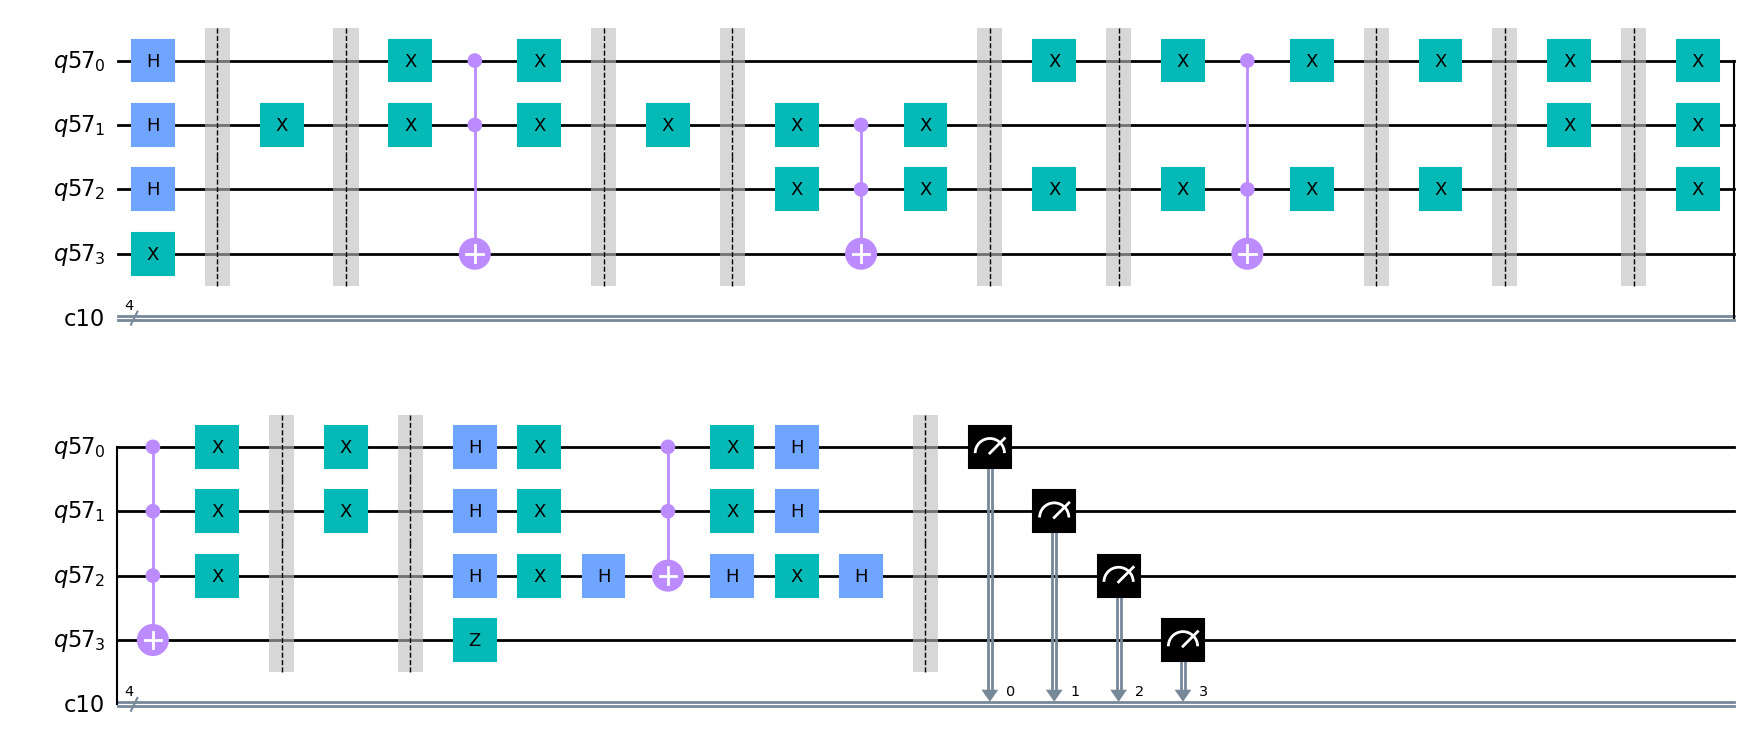

In [24]:
clause1 = [1,-2,0]
clause2 = [0,2,3]
clause3 = [-1,0,-3]
clause4 = [-1,-2,3]

qr = QuantumRegister(len(clause1)+1)
cr = ClassicalRegister(len(clause1)+1)
qc = QuantumCircuit(qr,cr)
qc.h(qr[:len(clause1)])
qc.x(qr[-1])
qc.barrier()

encode_clause(clause1,qc,qr)
encode_clause(clause2,qc,qr)
encode_clause(clause3,qc,qr)
encode_clause(clause4,qc,qr)

qc.z(qr[-1])
qc.h(qr[:-1])
qc.x(qr[:-1])
qc.h(qr[-2])
qc.mct([qr[i] for i in range(len(clause1)-1)],qr[[-2]])
qc.h(qr[-2])
qc.x(qr[:-1])
qc.h(qr[:-1])
qc.barrier()

qc.measure(qr[:],cr[:])
qc.draw('mpl')

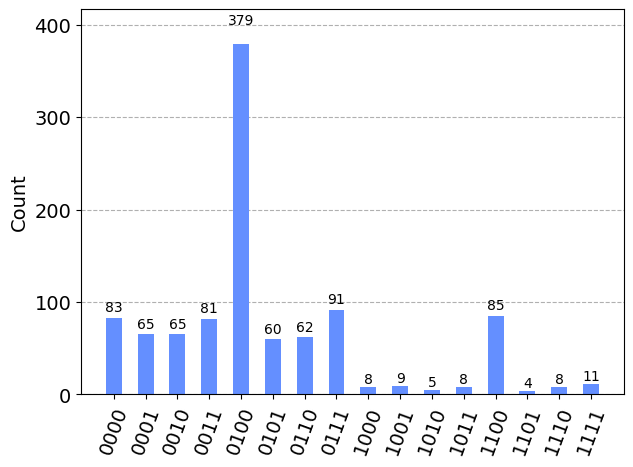

In [25]:
result = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(result)